# Analysis

In [1]:
using PythonCall

In [1]:
# using CondaPkg
# CondaPkg.add("xrft")

# CondaPkg.withenv() do
    # run(`python --version`)
# end

In [15]:
using AlgebraOfGraphics,
    CairoMakie
using DataFrames,
    DataFramesMeta,
    CategoricalArrays
using Arrow
using Statistics
using LinearAlgebra
using LaTeXStrings
using Latexify
using beforerr
include("utils/io.jl")
include("utils/analysis.jl")

plot_fields_time (generic function with 1 method)

In [16]:
dim = 3
dim = 1
beta = 0.25
theta = 60.0
eta = 100.0

meta = setup(dim, beta, theta, eta)

Dict{String, Any} with 50 entries:
  "diag_field"   => true
  "w_pi"         => 13165.5
  "Lz_norm"      => 128
  "dt"           => 0.0102491
  "Lx_norm"      => 0
  "m_ion_norm"   => 1836.15
  "nz"           => 256
  "Te"           => 62.0516
  "ny"           => 8
  "wave_number"  => 2
  "dz_norm"      => 0.5
  "vA_over_c"    => 0.000727373
  "warpx_kwargs" => Dict{String, Any}()
  "Lz"           => 2.9147e6
  "nppc"         => 64
  "dz"           => 11385.5
  "k"            => 4.31138e-6
  "grid_kwargs"  => Dict{String, Any}()
  "m_ion"        => 1.67262e-27
  ⋮              => ⋮

In [17]:
if dim == 1
    z = :x
elseif dim== 2
    z = :y
else
    z = :z
end

:x

In [18]:
df = load_field(meta)

128256×16 DataFrame
    Row │ Bx          By          Bz        Ex            Ey            Ez     ⋯
        │ Float64?    Float64?    Float64?  Float64?      Float64?      Float6 ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 8.66025e-8  9.99699e-8    5.0e-8   0.0           0.0          0.0    ⋯
      2 │ 8.66025e-8  9.9729e-8     5.0e-8   0.0           0.0          0.0
      3 │ 8.66025e-8  9.9248e-8     5.0e-8   0.0           0.0          0.0
      4 │ 8.66025e-8  9.85278e-8    5.0e-8   0.0           0.0          0.0
      5 │ 8.66025e-8  9.75702e-8    5.0e-8   0.0           0.0          0.0    ⋯
      6 │ 8.66025e-8  9.63776e-8    5.0e-8   0.0           0.0          0.0
      7 │ 8.66025e-8  9.49528e-8    5.0e-8   0.0           0.0          0.0
      8 │ 8.66025e-8  9.32993e-8    5.0e-8   0.0           0.0          0.0
   ⋮    │     ⋮           ⋮          ⋮           ⋮             ⋮             ⋮ ⋱
 128250 │ 8.51356e-8  2.86332e-8    5.0e-8  -0.00309729    7.90342e-5   0.0057 ⋯
 128251 │ 8.624e-8    3.0323e-8     5.0e-8  -0.00250541   -1.99199e-5   0.0043
 128252 │ 9.07824e-8  3.15141e-8    5.0e-8  -0.00252213   -0.000246951  0.0047
 128253 │ 9.11389e-8  3.22576e-8    5.0e-8  -0.00332024   -0.000381068  0.0064
 128254 │ 8.73943e-8  3.1365e-8     5.0e-8  -0.00399127   -0.000421636  0.0070 ⋯
 128255 │ 8.24276e-8  3.40564e-8    5.0e-8  -0.00391873   -0.000464411  0.0067
 128256 │ 8.11812e-8  3.95197e-8    5.0e-8  -0.00350729   -0.000768429  0.0066
                                              11 columns and 128241 rows omitted

In [19]:
p_df = load_pressure_df()

128256×16 DataFrame
    Row │ z        p_xx         p_yy         p_zz         time      Bx         ⋯
        │ UInt32?  Float64?     Float64?     Float64?     Float64?  Float64?   ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1  1.05409e-42  8.21669e-43  1.00523e-42     0.0    8.66025e-8 ⋯
      2 │       2  1.3321e-42   1.18596e-42  6.66347e-43     0.0    8.66025e-8
      3 │       3  1.01222e-42  7.57341e-43  1.16869e-42     0.0    8.66025e-8
      4 │       4  8.21951e-43  1.18606e-42  1.07712e-42     0.0    8.66025e-8
      5 │       5  8.43233e-43  1.07137e-42  1.13715e-42     0.0    8.66025e-8 ⋯
      6 │       6  1.11023e-42  9.24582e-43  9.85338e-43     0.0    8.66025e-8
      7 │       7  1.2948e-42   1.50397e-42  1.01147e-42     0.0    8.66025e-8
      8 │       8  1.05421e-42  1.1405e-42   1.12108e-42     0.0    8.66025e-8
   ⋮    │    ⋮          ⋮            ⋮            ⋮          ⋮          ⋮      ⋱
 128250 │     250  2.03908e-42  1.34556e-42  1.65891e-42   327.972  8.51356e-8 ⋯
 128251 │     251  1.80222e-42  1.14548e-42  1.40044e-42   327.972  8.624e-8
 128252 │     252  1.86059e-42  1.43789e-42  1.07214e-42   327.972  9.07824e-8
 128253 │     253  2.04281e-42  1.14619e-42  2.00954e-42   327.972  9.11389e-8
 128254 │     254  1.72033e-42  1.15143e-42  1.10303e-42   327.972  8.73943e-8 ⋯
 128255 │     255  2.28567e-42  1.0537e-42   1.20337e-42   327.972  8.24276e-8
 128256 │     256  2.16477e-42  1.34681e-42  1.64804e-42   327.972  8.11812e-8
                                              10 columns and 128241 rows omitted

In [ ]:
B_fields = names(df, r"B")
E_field = names(df, r"E")
j_field = names(df, r"j")
rho_field = names(df, r"rho")

variables = [B_fields; E_field; j_field]

9-element Vector{String}:
 "Bx"
 "By"
 "Bz"
 "Ex"
 "Ey"
 "Ez"
 "jx"
 "jy"
 "jz"

In [ ]:
# calculate the mean of the data by averaging over "y" and "z"
z_norm_lab = L"z~(d_i)"
time_norm_lab = L"T~(T_{ci})"
ids = [:z_norm, :time_norm]
labs = [z_norm_lab, time_norm_lab]

function get_avg_fields(df, fields; ids=ids)
    @chain df begin
        groupby(ids)
        combine(fields .=> mean, renamecols=false)
        stack(fields, ids)
    end
end

function plot_fields(df, fields; ids=ids, fig_options = (size = (800, 800),))

    temp_df = get_avg_fields(df, fields, ids=ids)
    plt = data(temp_df) * mapping(Pair.(ids, labs)..., :value, row = :variable) * visual(Heatmap)

    draw(plt; figure = fig_options)
end

plot_fields_time (generic function with 1 method)

In [11]:
plot_fields(df, B_fields)
easy_save("B_field")
plot_fields(df, E_field)
easy_save("E_field")
plot_fields(df, j_field)
easy_save("j_field")
plot_fields(df, rho_field)
easy_save("rho_field");

┌ Info: Saved figures/B_field
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved figures/E_field
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved figures/j_field
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34
┌ Info: Saved figures/rho_field
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


In [14]:
plot_fields_time(df, B_fields; step=8)
easy_save("B_time");

┌ Info: Saved figures/B_time
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


┌ Info: Saved figures/B_rho_time
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


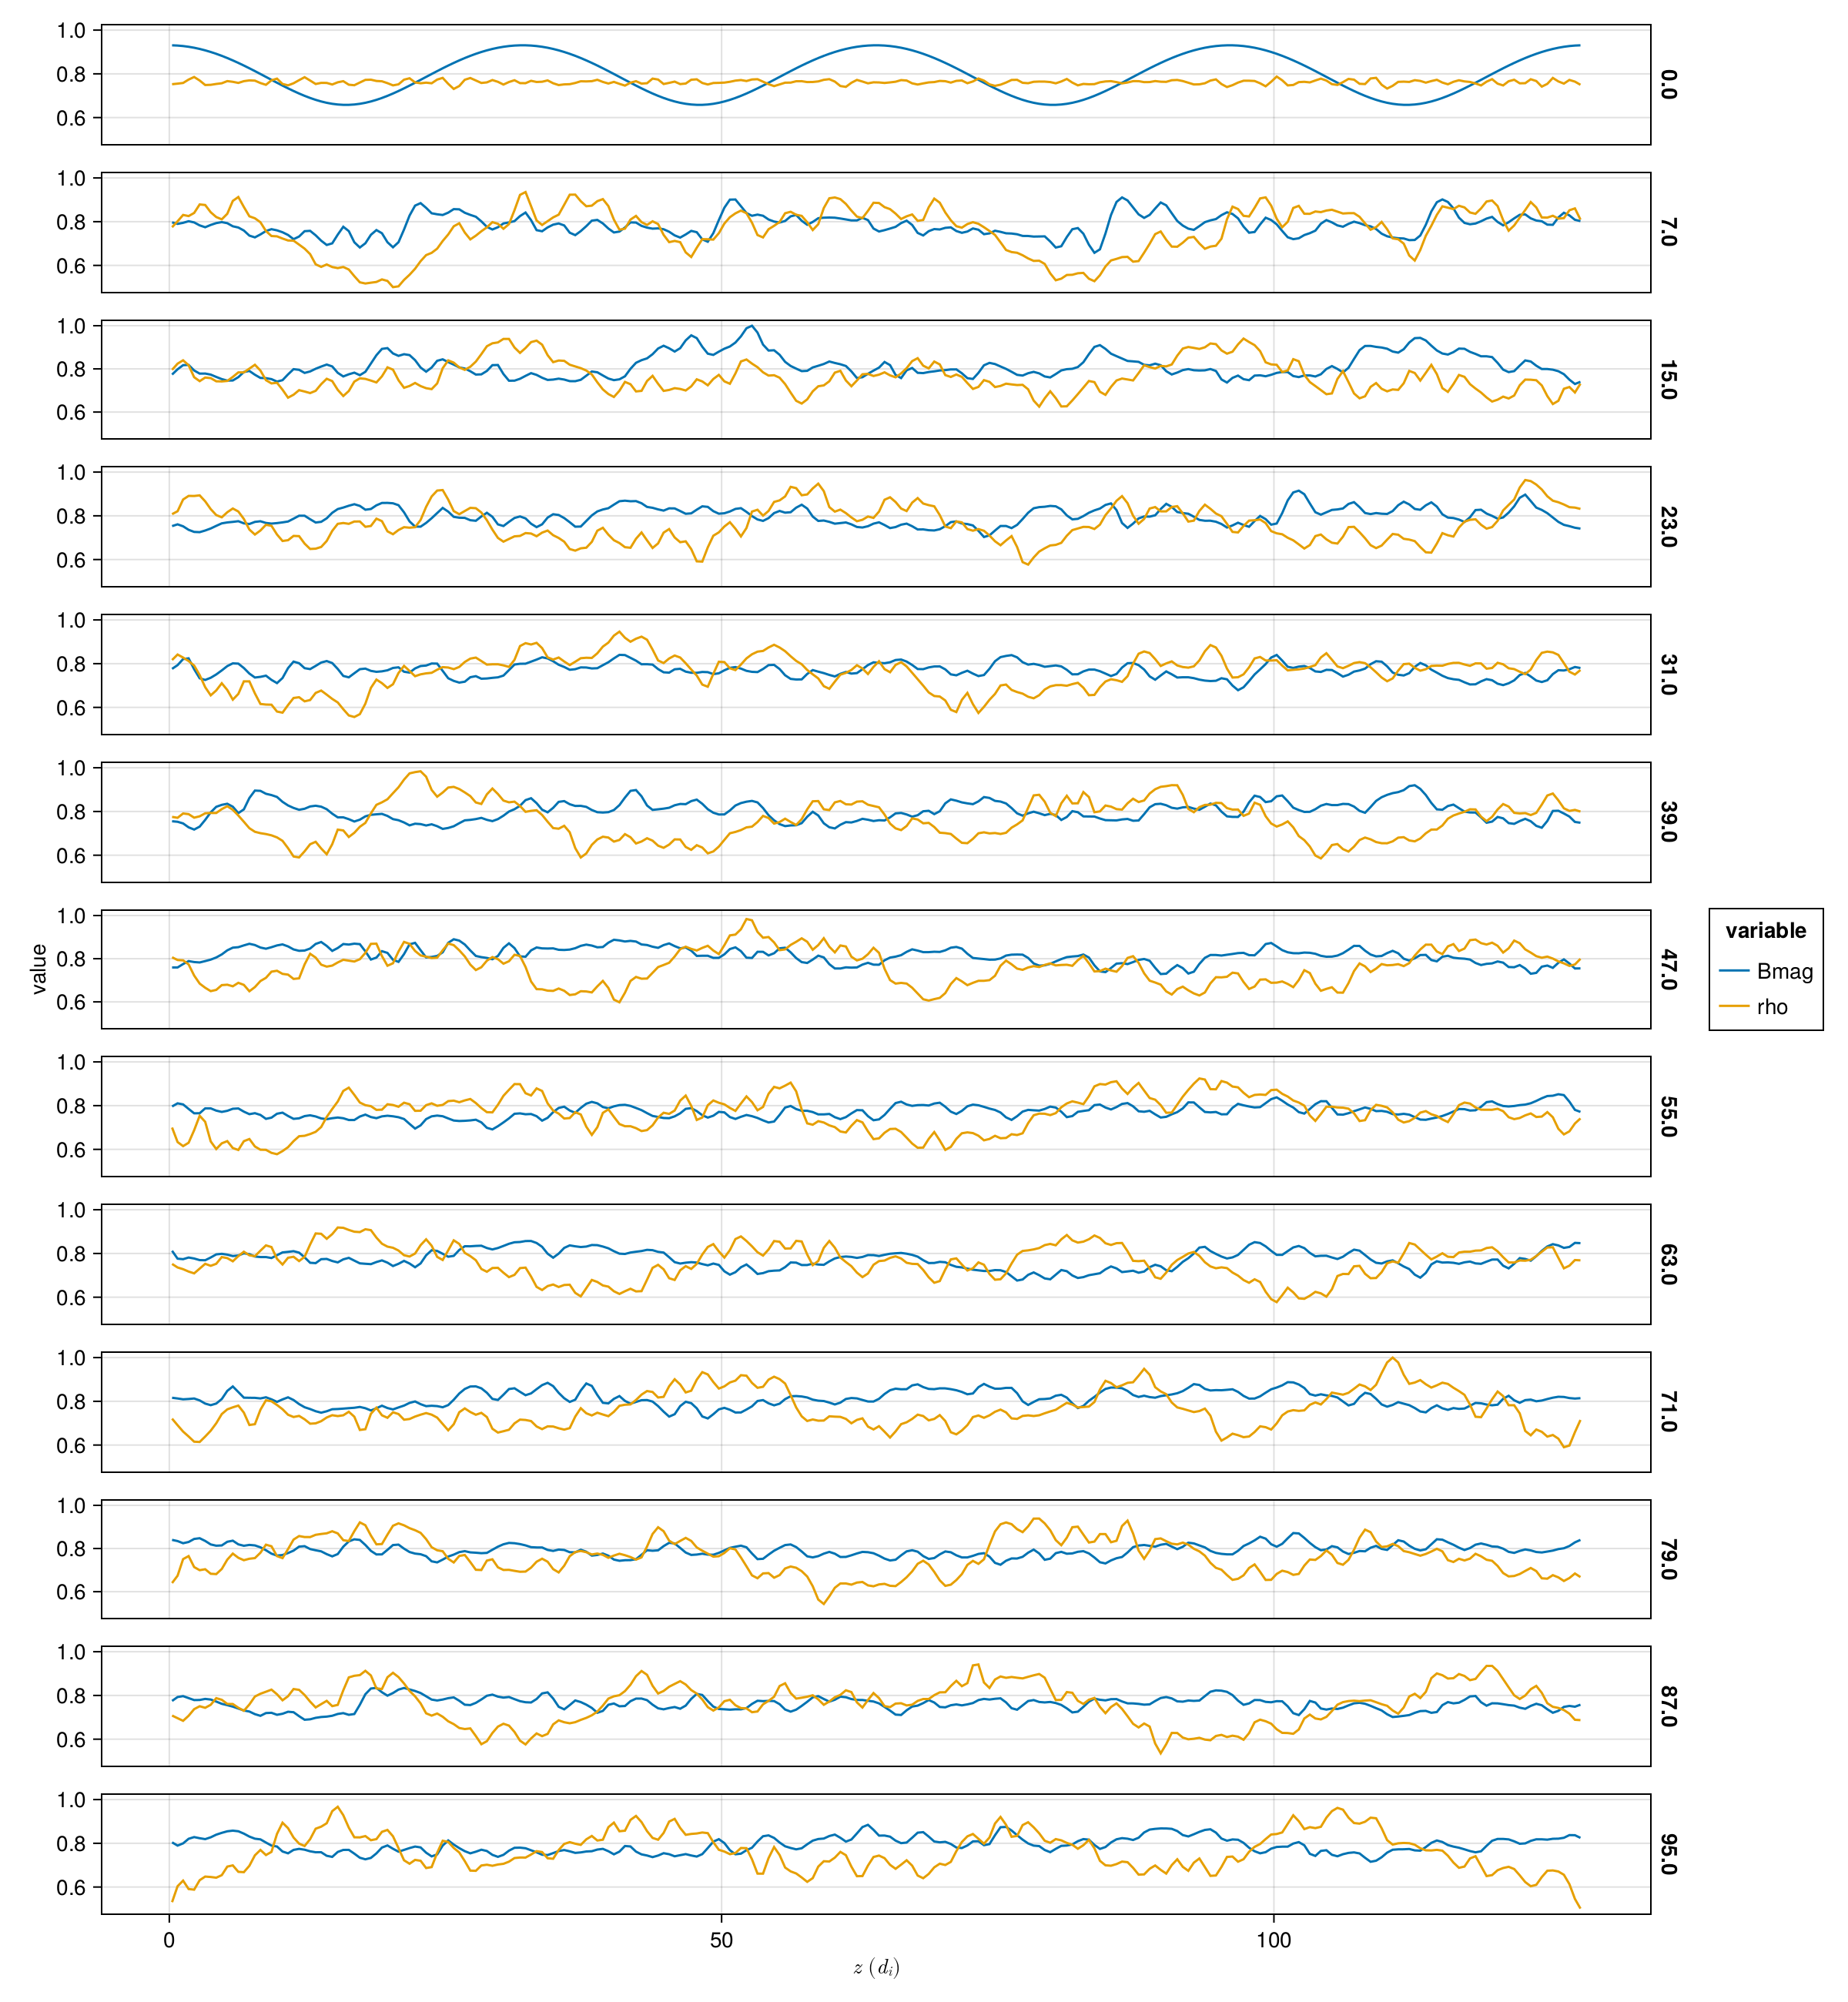

In [15]:
plot_fields_time(df, [:Bmag, :rho]; step=8, norm=true)
easy_save("B_rho_time")

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Info: Saved figures/pressure_xyz
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


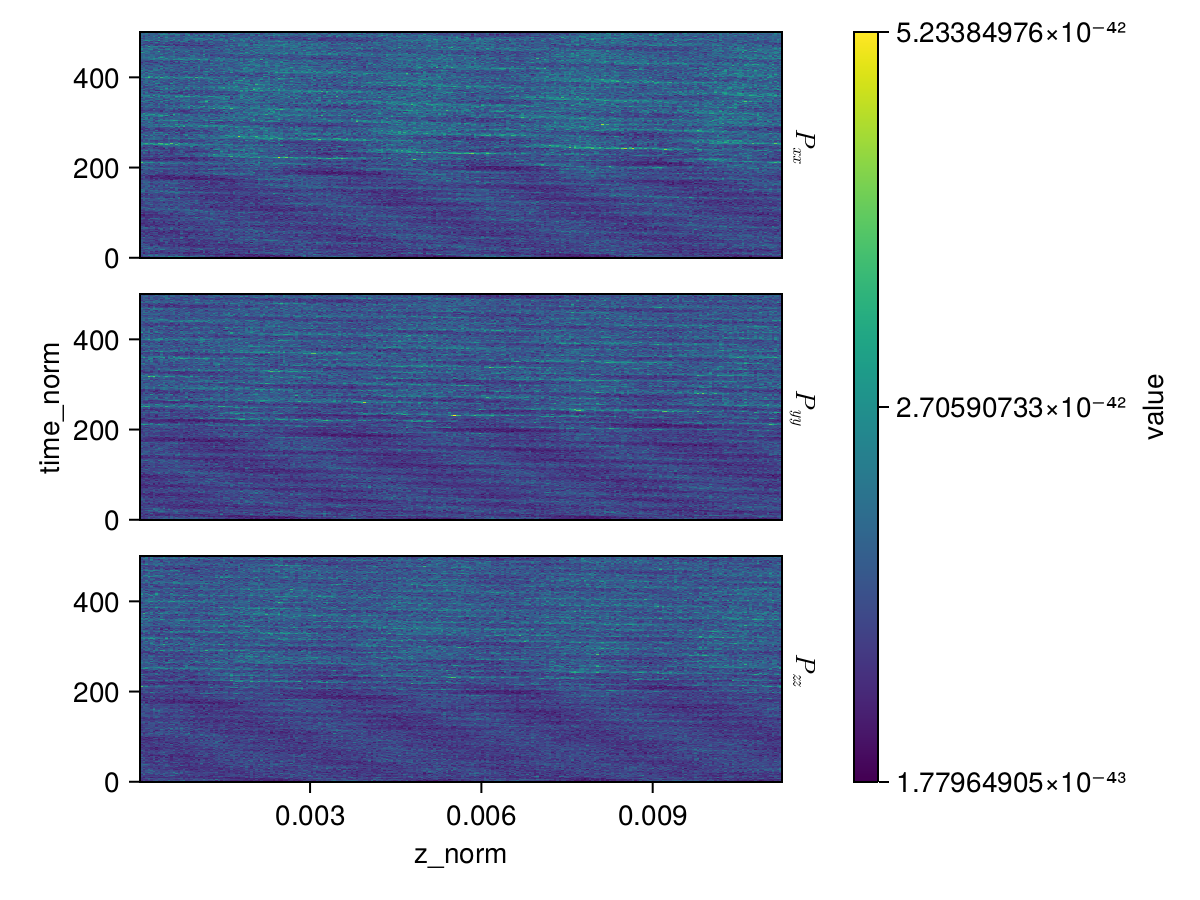

In [32]:
function plot_pressure_evolution(; cols = [:P_xx, :P_yy, :P_zz], norm=false)
    df = load_pressure_df()
    normalize_df!(df)
    temp_df = stack(df, cols, ids)

    if norm
        temp_df = @by temp_df :variable begin
            :value = :value / maximum(abs.(:value))
            :time_norm
            :z_norm
        end
    end

    data(temp_df) * mapping(ids..., :value, row = :variable => latexify) * visual(Heatmap) |> draw
end

plot_pressure_evolution()
easy_save("pressure_xyz")

In [29]:
df = load_pressure_df()
describe(df)

14×7 DataFrame
 Row │ variable    mean           min           median         max             ⋯
     │ Symbol      Float64        Real          Float64        Real            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ z           128.5           1            128.5          256             ⋯
   2 │ P_xx          1.52061e-42   2.46222e-43    1.46868e-42    4.73619e-42
   3 │ P_yy          1.38781e-42   1.78586e-43    1.33966e-42    5.23409e-42
   4 │ P_zz          1.39738e-42   2.49315e-43    1.34698e-42    3.96153e-42
   5 │ time        163.986         0.0          163.986        327.972         ⋯
   6 │ Bx            8.66025e-8    5.15953e-8     8.5378e-8      1.56418e-7
   7 │ By            2.18101e-23  -1.21787e-7     1.62435e-9     1.27663e-7
   8 │ Bz            5.0e-8        5.0e-8         5.0e-8         5.0e-8
   9 │ x             0.5           0.5            0.5            0.5           ⋯
  10 │ y             0.5           0.5            0.5            0.5
  11 │ Bmag          1.14182e-7    8.15245e-8     1.13578e-7     1.76479e-7
  12 │ p_parp        2.36449e-42   4.95725e-43    2.31044e-42    6.3681e-42
  13 │ p_perp        9.70656e-43   2.12595e-43    9.3688e-43     3.04996e-42   ⋯
  14 │ anisotropy    0.413393      0.248098       0.393446       1.00867
                                                               2 columns omitted

┌ Info: Saved figures/pressure_anisotropy
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


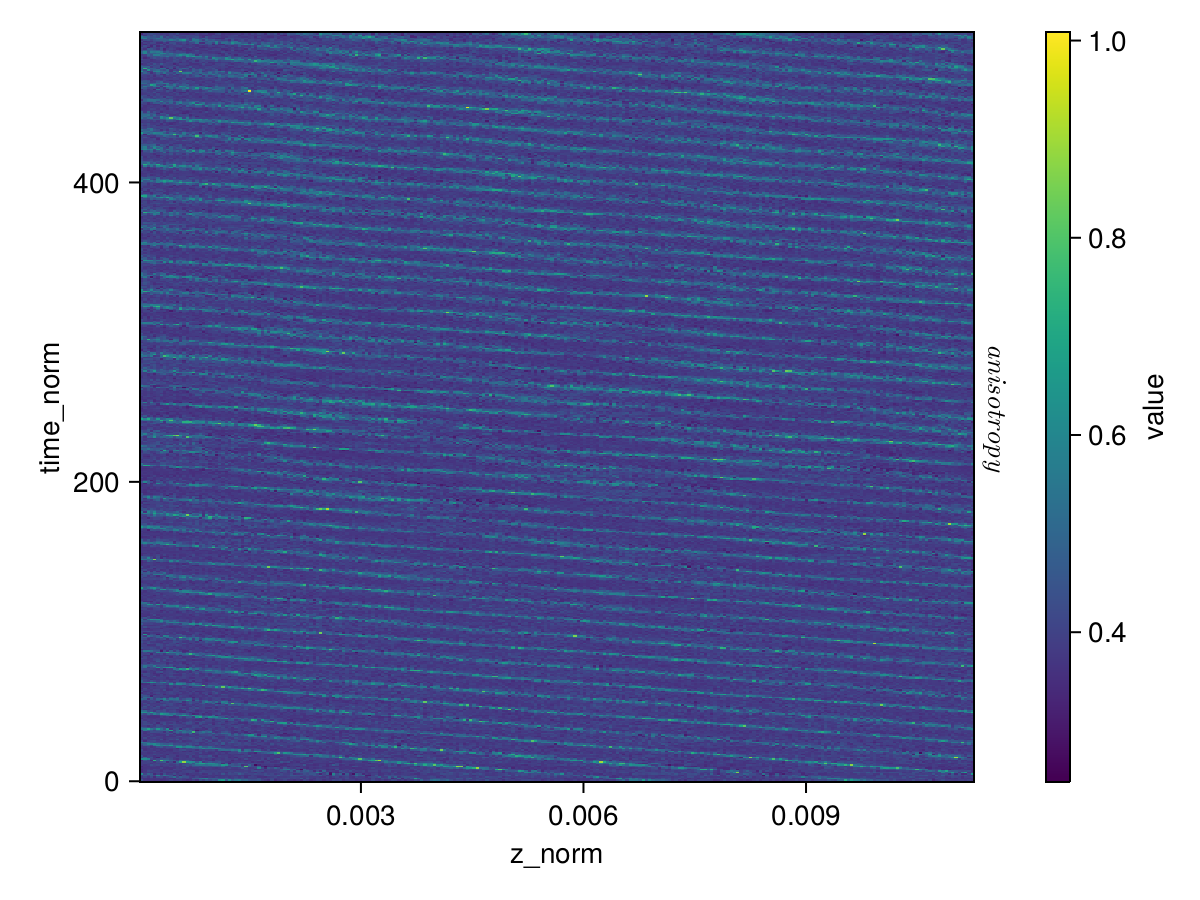

In [33]:
plot_pressure_evolution(cols = [:anisotropy], norm=false)
easy_save("pressure_anisotropy")

┌ Info: Saved figures/pressure_perp_parp
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


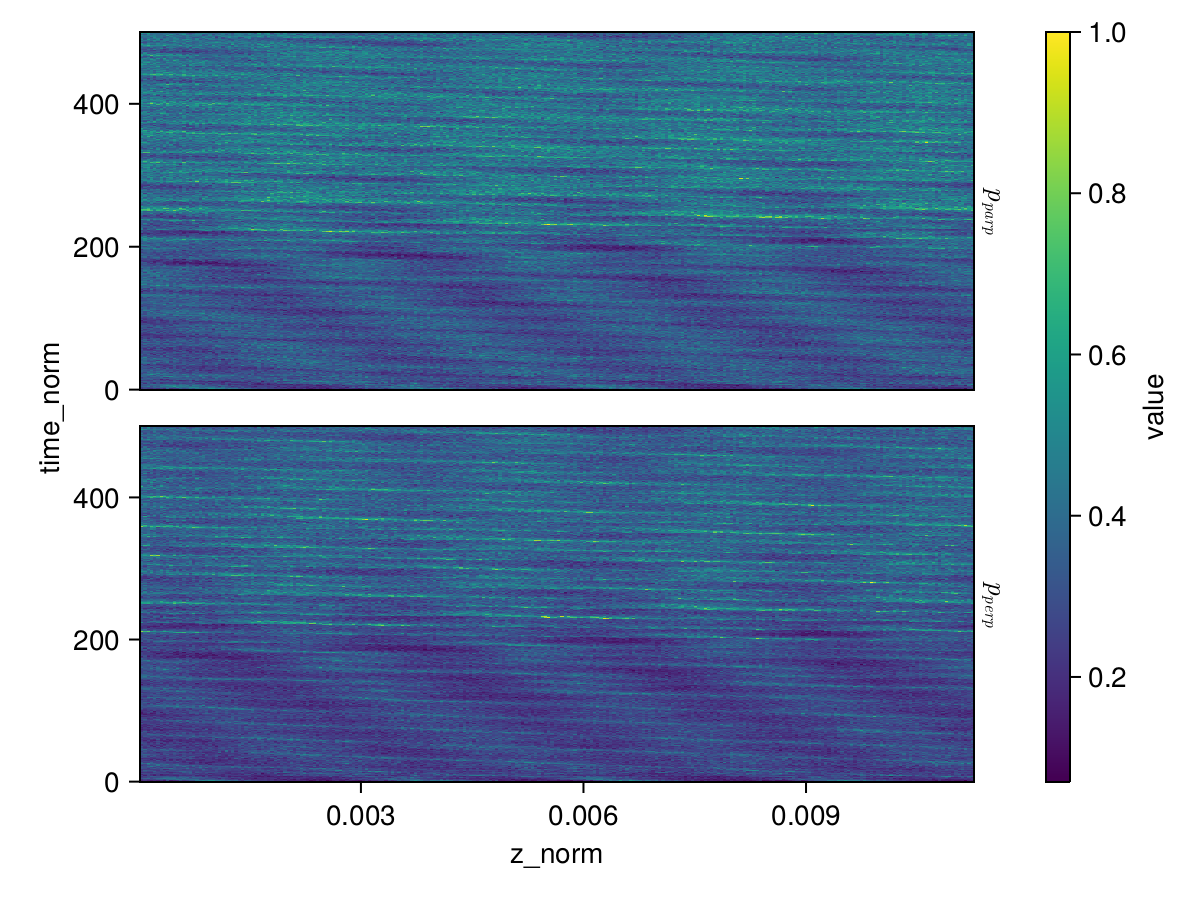

In [34]:
plot_pressure_evolution(cols = [:p_parp, :p_perp], norm=true)
easy_save("pressure_perp_parp")

## Fluid fields

In [ ]:
file = "particle.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

In [ ]:
df.z_norm = df.particle_position_z / meta["d_i"]
df.py_norm = df.particle_momentum_y / 1e-25

In [ ]:
plt = data(df) * mapping(:particle_position_z, :time,:particle_momentum_y) * visual(Heatmap)
draw(plt)

### Non-binned particle data

In [ ]:
df.time_norm = CategoricalArray(df.time ./ meta["t_ci"])

In [ ]:
z_norm_edge = 0:1:240
py_norm_edge = -1e3:10:1e3

In [ ]:
datalimits_f = x -> quantile(x, [0.05, 0.95])

In [ ]:
fig_options = (size = (1200, 1000),)

plt = data(df) * mapping(:z_norm, :py_norm, layout=:time_norm) * histogram(datalimits=datalimits_f)
p = draw(plt; figure = fig_options)

## Parameters

In [ ]:
using Pkg
Pkg.add("Symbolics")

In [ ]:
using Symbolics

In [ ]:
@variables t x y μ_0 B ρ c n q m ϵ_0

Alfven_speed = B / sqrt(μ_0 * ρ)

# plasma frequency
ω_p = sqrt(n * q / (m * ϵ_0))
# inertial_length
d_i = c / ω_p

# gryofrequency
ω_c = q * B / m


simplify(ω_c / ω_p)

In [ ]:
ω_c / ω_p